# A. Assignment details

- What: Download, manipulate and merge two or more datasets from below
- How: Create functions in a python file to do this
- Show: Show how to use these python files in a notebook

More details here: reports/assignments/milestone_1/extracredit_explainer.md


## 1.1 Download data

Country        Japan           Vietnam
Year                                  
1986     6293.362143               0.0
1987     5649.230901               0.0
1988     5377.221658               0.0
1989     5275.287989               0.0
1990     4831.135727               0.0
1991     4739.543998               0.0
1992     5447.501855               0.0
1993     5053.508856               0.0
1994     6240.261676               0.0
1995     5634.594227               0.0
1996     5083.327212               0.0
1997      4371.68487               0.0
1998     4732.948199               0.0
1999      4873.93117               0.0
2000     4809.201589   11708376.663324
2001     4359.053584   15043142.794165
2002     4378.930584   -5996661.562816
2003     4353.219738   14806289.125943
2004     4005.561047   15102073.074332
2005     3875.253501    16482452.25902
2006     3647.266674   10926732.113416
2007     3204.604507   -8836703.008349
2008     3357.822566 -124610240.502069
2009     3247.964823   51

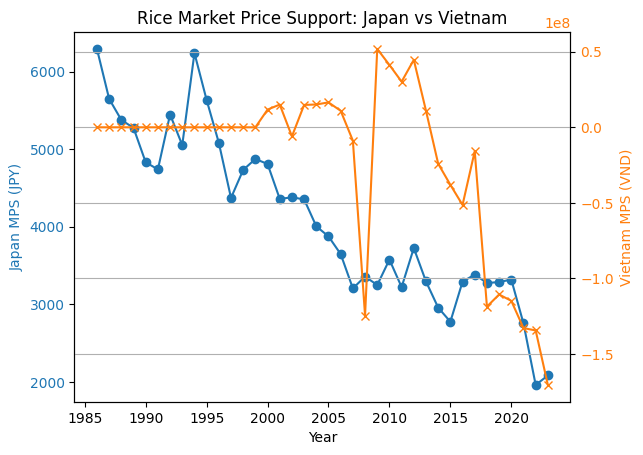

In [2]:
# YOUR CODE HERE
# This line saves the web address (URL) of the World Bank data file as text in a variable named 'url'.
# Step1 Import Libraries
import pandas as pd
import matplotlib.pyplot as plt


# Step2 Define Functions
def load_rice_mps(file_path):
    """
    Load the 'TOTAL' sheet from the Excel file and extract the Market Price Support (MPS) data for Rice.
    """
    # Read the entire sheet
    df = pd.read_excel(file_path, sheet_name='TOTAL', header=None)

    # Find the row that contains 'Rice' (searching within the second column)
    rice_row_index = df[df[1].astype(str).str.contains('Rice', na=False, case=False)].index[0]

    # Extract data from column 'at' to 'ce' (Python index 45 to 82)
    rice_values = df.iloc[rice_row_index, 45:83].values

    # Generate a list of years from 1986 to 2023
    years = list(range(1986, 2024))

    # Create a clean DataFrame
    df_rice = pd.DataFrame({
        'Year': years,
        'MPS_Value': rice_values
    })

    return df_rice


# Step3 Load and Combine Data
# Load Japan data
df_jpn_rice = load_rice_mps('../Data/pse-jpn-2024.xls')
df_jpn_rice['Country'] = 'Japan'

# Load Vietnam data
df_vnm_rice = load_rice_mps('../Data/pse-vnm-2024.xls')
df_vnm_rice['Country'] = 'Vietnam'

# Merge both datasets
df_rice_all = pd.concat([df_jpn_rice, df_vnm_rice], ignore_index=True)

# Pivot the data to have countries as columns
df_pivot = df_rice_all.pivot(index='Year', columns='Country', values='MPS_Value')
print(df_pivot)


# Step4 Visualization
fig, ax1 = plt.subplots()

# Plot for Japan on the left Y-axis
color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Japan MPS (JPY)', color=color)
ax1.plot(df_pivot.index, df_pivot['Japan'], color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

# Plot for Vietnam on the right Y-axis
ax2 = ax1.twinx()  # Create a second Y-axis sharing the same X-axis

color = 'tab:orange'
ax2.set_ylabel('Vietnam MPS (VND)', color=color)
ax2.plot(df_pivot.index, df_pivot['Vietnam'], color=color, marker='x')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Rice Market Price Support: Japan vs Vietnam')
plt.grid(True)
plt.show()

## 1.2 Manipulate Data

## 1.3 Merge Data

## Global datasets

- What: Download, manipulate and merge two or more datasets from below
- How: Create functions in a python file to do this
- Show: Show how to use these python files in a notebook

* **Penn World Table (PWT):** Provides purchasing power parity and national income accounts data.
    * **Link:** [http://www.ggdc.net/pwt](http://www.ggdc.net/pwt)

* **UNCTADstat (UNCTAD):** Offers data on trade, investment, and development.
    * **Link:** [https://unctadstat.unctad.org/](https://unctadstat.unctad.org/)

* **FAOSTAT (FAO):** Provides data on food, agriculture, forestry, and related areas.
    * **Link:** [http://www.fao.org/faostat/en/#data](http://www.fao.org/faostat/en/#data)

* **ILOSTAT (ILO):** Offers labor statistics, including employment and wages.
    * **Link:** [https://ilostat.ilo.org/](https://ilostat.ilo.org/)

* **Federal Reserve Economic Data (FRED):** Economic and financial data from the Federal Reserve.
    * **Link:** [https://fred.stlouisfed.org/](https://fred.stlouisfed.org/)

* **Bank for International Settlements (BIS):** Data and statistics on banking, financial markets, and the global economy.
    * **Link:** [https://www.bis.org/statistics/index.htm](https://www.bis.org/statistics/index.htm)

* **International Monetary Fund (IMF) Data:** A variety of macroeconomic and financial data.
    * **Link:** [https://www.imf.org/en/data](https://www.imf.org/en/data)

* **Eurostat:** Provides a wide range of statistics on the European Union, including economic, social, and demographic data.
    * **Link:** [https://ec.europa.eu/eurostat/](https://ec.europa.eu/eurostat/)

* **World Bank Data:** Comprehensive data on development indicators across countries.
    * **Link:** [https://data.worldbank.org/](https://data.worldbank.org/)

* **Varieties of Democracy (V-Dem):** Datasets measuring various aspects of democracy across countries.
    * **Link:** [https://v-dem.net/](https://v-dem.net/)

* **OECD Data:** Statistics and indicators from the Organisation for Economic Co-operation and Development, covering a broad range of topics.
    * **Link:** [https://data.oecd.org/](https://data.oecd.org/)

* **Quality of Government (QoG):** Datasets on governance, institutions, and quality of government.
    * **Link:** [https://qog.gu.se/](https://qog.gu.se/)

* **IPCC Data:** Climate change data and scenarios from the Intergovernmental Panel on Climate Change.
    * (Note: Access to data varies, often through specific reports or data portals linked within the IPCC website)
    * **Link:** [https://www.ipcc.ch/](https://www.ipcc.ch/)

* **Our World in Data:** Research and data on global development, poverty, health, and other topics.
    * **Link:** [https://ourworldindata.org/](https://ourworldindata.org/)

* **UN Comtrade:** United Nations Commodity Trade Statistics Database.
    * **Link:** [https://comtrade.un.org/](https://comtrade.un.org/)


## Academic datasets

* **Dallas Fed Global Economic Indicators (DGEI):** [DGEI](https://www.dallasfed.org/research/international/dgei)
* **Dallas Fed International House Price Database:** [House Price](https://www.dallasfed.org/research/international/houseprice#data)
* **New York Fed r* (Natural Rate of Interest):** [r*](https://www.newyorkfed.org/research/policy/rstar)
* **Chinn-Ito Index (KAOPEN):** [KAOPEN](https://web.pdx.edu/~ito/Chinn-Ito_website.htm)
* **Metrick-Schmelzing Paper and Database (Long-Term Real Rates):** [Real Rates](https://som.yale.edu/centers/program-on-financial-stability/metrick-schmelzing-paper-and-database)
* **Yale Program on Financial Stability COVID-19 Tracker:** [COVID-19 Tracker](https://som.yale.edu/centers/program-on-financial-stability/covid-19-tracker)
* **IMF Financial Integration:** [Financial Integration](https://www.imf.org/en/Publications/WP/Issues/2017/05/10/International-Financial-Integration-in-the-Aftermath-of-the-Global-Financial-Crisis-44906)
* **IMF Macroprudential Policy Survey:** [Macroprudential](https://www.elibrary-areaer.imf.org/Macroprudential/Pages/Home.aspx)
* **Nancy Xu's Risk Aversion Index:** [Risk Aversion](https://www.nancyxu.net/risk-aversion-index)
* **Jorda-Schularick-Taylor Macrohistory Database:** [Macrohistory](https://www.nber.org/research/data/jorda-schularick-taylor-macrohistory)
* **Central Bank Independence (CBI) Data:** [CBI Data](https://sites.google.com/site/carogarriga/cbi-data-1)
* **Global Inflation Data:** [Inflation Data](https://www.worldbank.org/en/research/brief/inflation-database)

## U.S Datasets
- https://www.sca.isr.umich.edu/tables.html
- https://www.bea.gov/data
- https://www.bls.gov/jlt/
- https://adpemploymentreport.com/

## Japan datasets

* **Economy Watchers Survey (Cabinet Office):** [Watchers Survey](https://www5.cao.go.jp/keizai3/watcher.html)
* **Consumption Trend Index (ESRI, Cabinet Office):** [Consumption Index](https://www.esri.cao.go.jp/en/stat/shouhi/shouhi-e.html)
* **Prefectural Accounts (ESRI, Cabinet Office):** [Prefectural Accounts](https://www.esri.cao.go.jp/jp/sna/sonota/kenmin/kenmin_top.html)
* **Insurance Statistics (General Insurance Association of Japan):** [Insurance Stats](https://www.sonpo.or.jp/en/statistics/index.html)
* **FSA Policy Response (Financial Services Agency):** [FSA Response](https://www.fsa.go.jp/news/r1/20200313-2.html)
* **Franchise Industry Data (Japan Franchise Association):** [Franchise Data](https://www.jfnet.or.jp/data/data_c.html)
* **Trends Foreign Visitors (MLIT, Japan Tourism Agency):** [Visitor Spending](https://www.mlit.go.jp/kankocho/tokei_hakusyo/gaikokujinshohidoko.html)
* **Tax and Stamp Revenues (Ministry of Finance):** [Tax Revenues](https://www.mof.go.jp/tax_policy/reference/taxes_and_stamp_revenues/data.htm)
* **Life Insurance Statistics (Life Insurance Association of Japan):** [Life Insurance](https://www.seiho.or.jp/english/statistics/)
* **Economic Growth (Tokyo Foundation for Policy Research):** [GDP](https://www.tkfd.or.jp/research/detail.php?id=2983)
* **Consumer Price Index (Statistics Bureau of Japan):** [CPI](https://www.stat.go.jp/english/data/cpi/1588.html#his)
* **Bank Financial Statements (Financial Services Agency):** [Bank Statements](https://www.fsa.go.jp/status/ginkou_kessan/index.html)
* **Budget Revenue and Expenditure (Ministry of Finance):** [Budget Data](https://www.mof.go.jp/policy/budget/report/revenue_and_expenditure/index.htm)
* **Trade Statistics (Japan Customs):** [Trade Stats](https://www.customs.go.jp/toukei/info/index_e.htm)
* **Banking Statistics (Japanese Bankers Association):** [Banking Stats](https://www.zenginkyo.or.jp/stats/year2-02/)
* **Household Expenditure Survey (Statistics Bureau):** [Household Spending](https://www.stat.go.jp/data/kakei/longtime/index.html#time)
* **Economic Statistics (Federation of Economic Organizations):** [Econ Stats](https://www.zenkeijikyo.or.jp/statistics)
* **Regional Banks:** [Regional Banks data](https://www.chiginkyo.or.jp/news_topics/)
* **Japan Economic Policy Uncertainty Index:** [Policy Uncertainty](https://www.policyuncertainty.com/japan_monthly.html)